In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 파일 이름 및 경로 설정
filename = 'g_3D_During_MLP(fc1)'
csv_file_path = f'/home/shkim/QT_DeiT_small/reproduce/probe_report_pertensor_test/gradient_mask/{filename}.csv'

# CSV 파일에서 데이터 불러오기
g_2D_df = pd.read_csv(csv_file_path, header=None)

# NumPy 배열로 변환
g_2D = g_2D_df.to_numpy()

# tokens과 channels 정의 (데이터 크기에 맞게 설정)
tokens = np.arange(g_2D.shape[0])  # 행 수만큼 토큰 생성
channels = np.arange(g_2D.shape[1])  # 열 수만큼 채널 생성
X, Y = np.meshgrid(tokens, channels, indexing='ij')

# Z 값 설정 (g_2D의 값)
Z = g_2D

# 1차원 배열로 변환
X_flat = X.ravel()
Y_flat = Y.ravel()
Z_flat = Z.ravel()

# 2D scatter plot 생성
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_flat, Y_flat, c=Z_flat, cmap='viridis', s=20, alpha=0.8)

# 컬러바 추가 (각 요소의 크기를 색상으로 표현)
plt.colorbar(scatter, label='Element Value')

# 축 레이블 설정
plt.xlabel('Token')
plt.ylabel('Channel')
plt.title('Tensor Element Distribution on Grid (Scatter Plot)')

# 그래프를 파일로 저장
plt.savefig('tensor_element_distribution_scatter.png')
plt.show()


TypeError: 'int' object is not callable

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# CSV 파일 불러오기

file_path = '/home/shkim/QT_DeiT_small/reproduce/probe_report/probe_result_Hidden_State.csv'
data = pd.read_csv(file_path)

print(data.head())


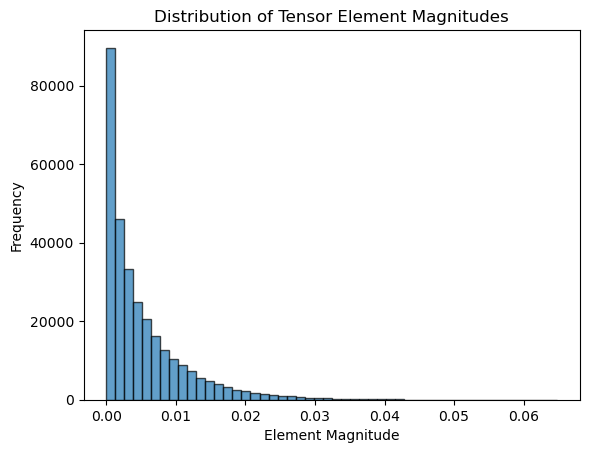

Ratio of zero elements: 0.00%
Ratio of non-zero elements: 100.00%


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# CSV 파일 불러오기

file_path = '/home/shkim/QT_DeiT_small/reproduce/probe_report_fullprecision/gradient_mask/g_3D_During_MLP(fc1)_iter200.csv'
data = pd.read_csv(file_path)

# 1. 데이터 전처리 (각 요소의 절대값 계산)
tensor_values = data.values.flatten()  # 데이터를 1차원으로 변환
abs_values = np.abs(tensor_values)     # 절대값 계산

# 2. 각 요소의 절대값 분포 시각화
plt.hist(abs_values, bins=50, edgecolor='k', alpha=0.7)
plt.xlabel('Element Magnitude')
plt.ylabel('Frequency')
plt.title('Distribution of Tensor Element Magnitudes')
plt.show()

# 3. 0과 0이 아닌 값의 비율 계산
zero_count = np.sum(tensor_values == 0)
non_zero_count = np.sum(tensor_values != 0)
total_count = tensor_values.size

zero_ratio = zero_count / total_count
non_zero_ratio = non_zero_count / total_count

print(f"Ratio of zero elements: {zero_ratio:.2%}")
print(f"Ratio of non-zero elements: {non_zero_ratio:.2%}")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 경로
file_path = '/home/shkim/QT_DeiT_small/reproduce/token_probing_results/Hidden_State/block_0_layer_Hidden_State_epoch_9_iteration_1250_min_median_ratios.csv'

# CSV 파일 읽기
data = pd.read_csv(file_path, header=None)

# x축은 열 번호 (197개)
x = range(data.shape[1])

# 모든 row별로 그래프 그리기
plt.figure(figsize=(15, 10))
for idx, row in data.iterrows():
    plt.plot(x, row, label=f'Row {idx}')
plt.title('Row-wise Graphs')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.grid(True)
plt.legend(loc='upper right', fontsize=8)
plt.show()

# 모든 row의 평균값 계산
y_mean = data.mean(axis=0)

# 평균값 그래프 그리기
plt.figure(figsize=(15, 5))
plt.plot(x, y_mean, label='Mean of Rows', color='red')
plt.title('Mean of All Rows')
plt.xlabel('Columns')
plt.ylabel('Mean Value')
plt.grid(True)
plt.legend()
plt.show()

: 

In [ ]:
import wandb
import matplotlib.pyplot as plt

# 1. WandB API 클라이언트 초기화
api = wandb.Api()

# 2. 서로 다른 run_id 가져오기
run_ids = ["vusp64fz", "wzv43ktl"]  # Run IDs를 리스트로 정의
project_name = "your_project_name"  # 프로젝트 이름

# 3. 데이터 불러오기
data_frames = []
for run_id in run_ids:
    run = api.run(f"{project_name}/{run_id}")
    # run.history()로 로그된 데이터를 가져옵니다 (예: 'loss', 'accuracy')
    data_frames.append(run.history())

# 4. 원하는 데이터 추출 및 병합
for df, run_id in zip(data_frames, run_ids):
    plt.plot(df['step'], df['loss'], label=f'Run {run_id}')  # 그래프 라벨 설정

# 5. 그래프 그리기
plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Loss Comparison Across Runs')
plt.legend()
plt.show()
